# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
#printing columns
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
#checking values count
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [5]:
#checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#checking shape
df.shape

(284807, 31)

# dropping the duplicates value

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(283726, 31)

# ploting the count of target

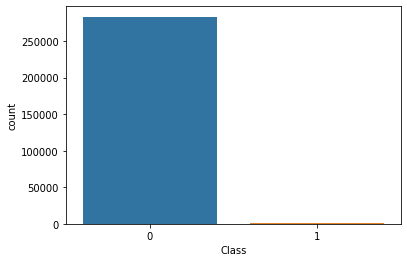

In [9]:
sns.countplot(df['Class'])
plt.show()

In [10]:
df['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 283726, dtype: float64

# separating features and labels

In [11]:
Y = df['Class']
X = df.drop('Class', axis=1)

# Balancing the dataset - oversampling

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X, Y  = sm.fit_resample(X, Y)

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Ploting the count plot after oversampling

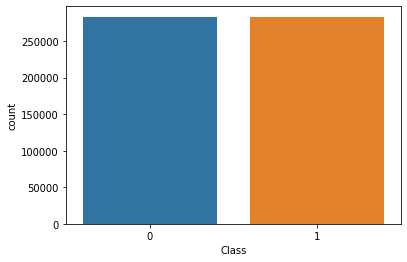

In [13]:
sns.countplot(Y)
plt.show()

# Standardizing the data

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(X)

# Dimensionality reduction

# Spliting the dataset into train and test

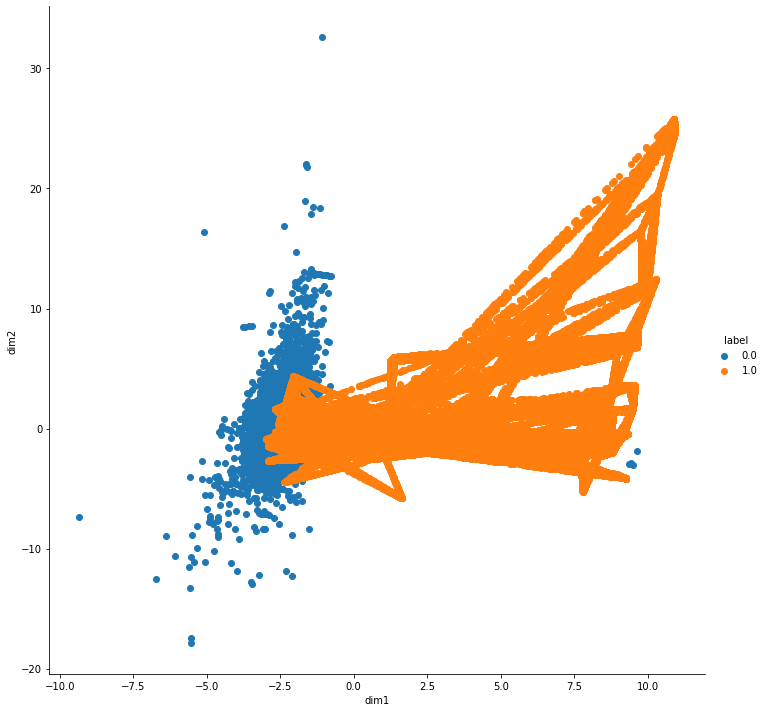

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 2
pca_data = pca.fit_transform(data)
pca_data.shape
pca_data = np.vstack((pca_data.T, Y)).T
pca_df = pd.DataFrame(data=pca_data, columns=('dim1', 'dim2', 'label'))
sns.FacetGrid(pca_df, hue='label', height=10).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data,Y,test_size=0.2, random_state=0)

In [17]:
X.shape

(566506, 30)

# Random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)
#predicting the values of x_test
pred = clf.predict(x_test)

# Checking the accuracy_score

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9545903867539849
